In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score, accuracy_score, balanced_accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

%matplotlib inline

In [2]:
seed = 42
np.random.seed(42)
random.seed(42)

In [3]:
dataframe = pd.read_csv("dados_voz_genero.csv")

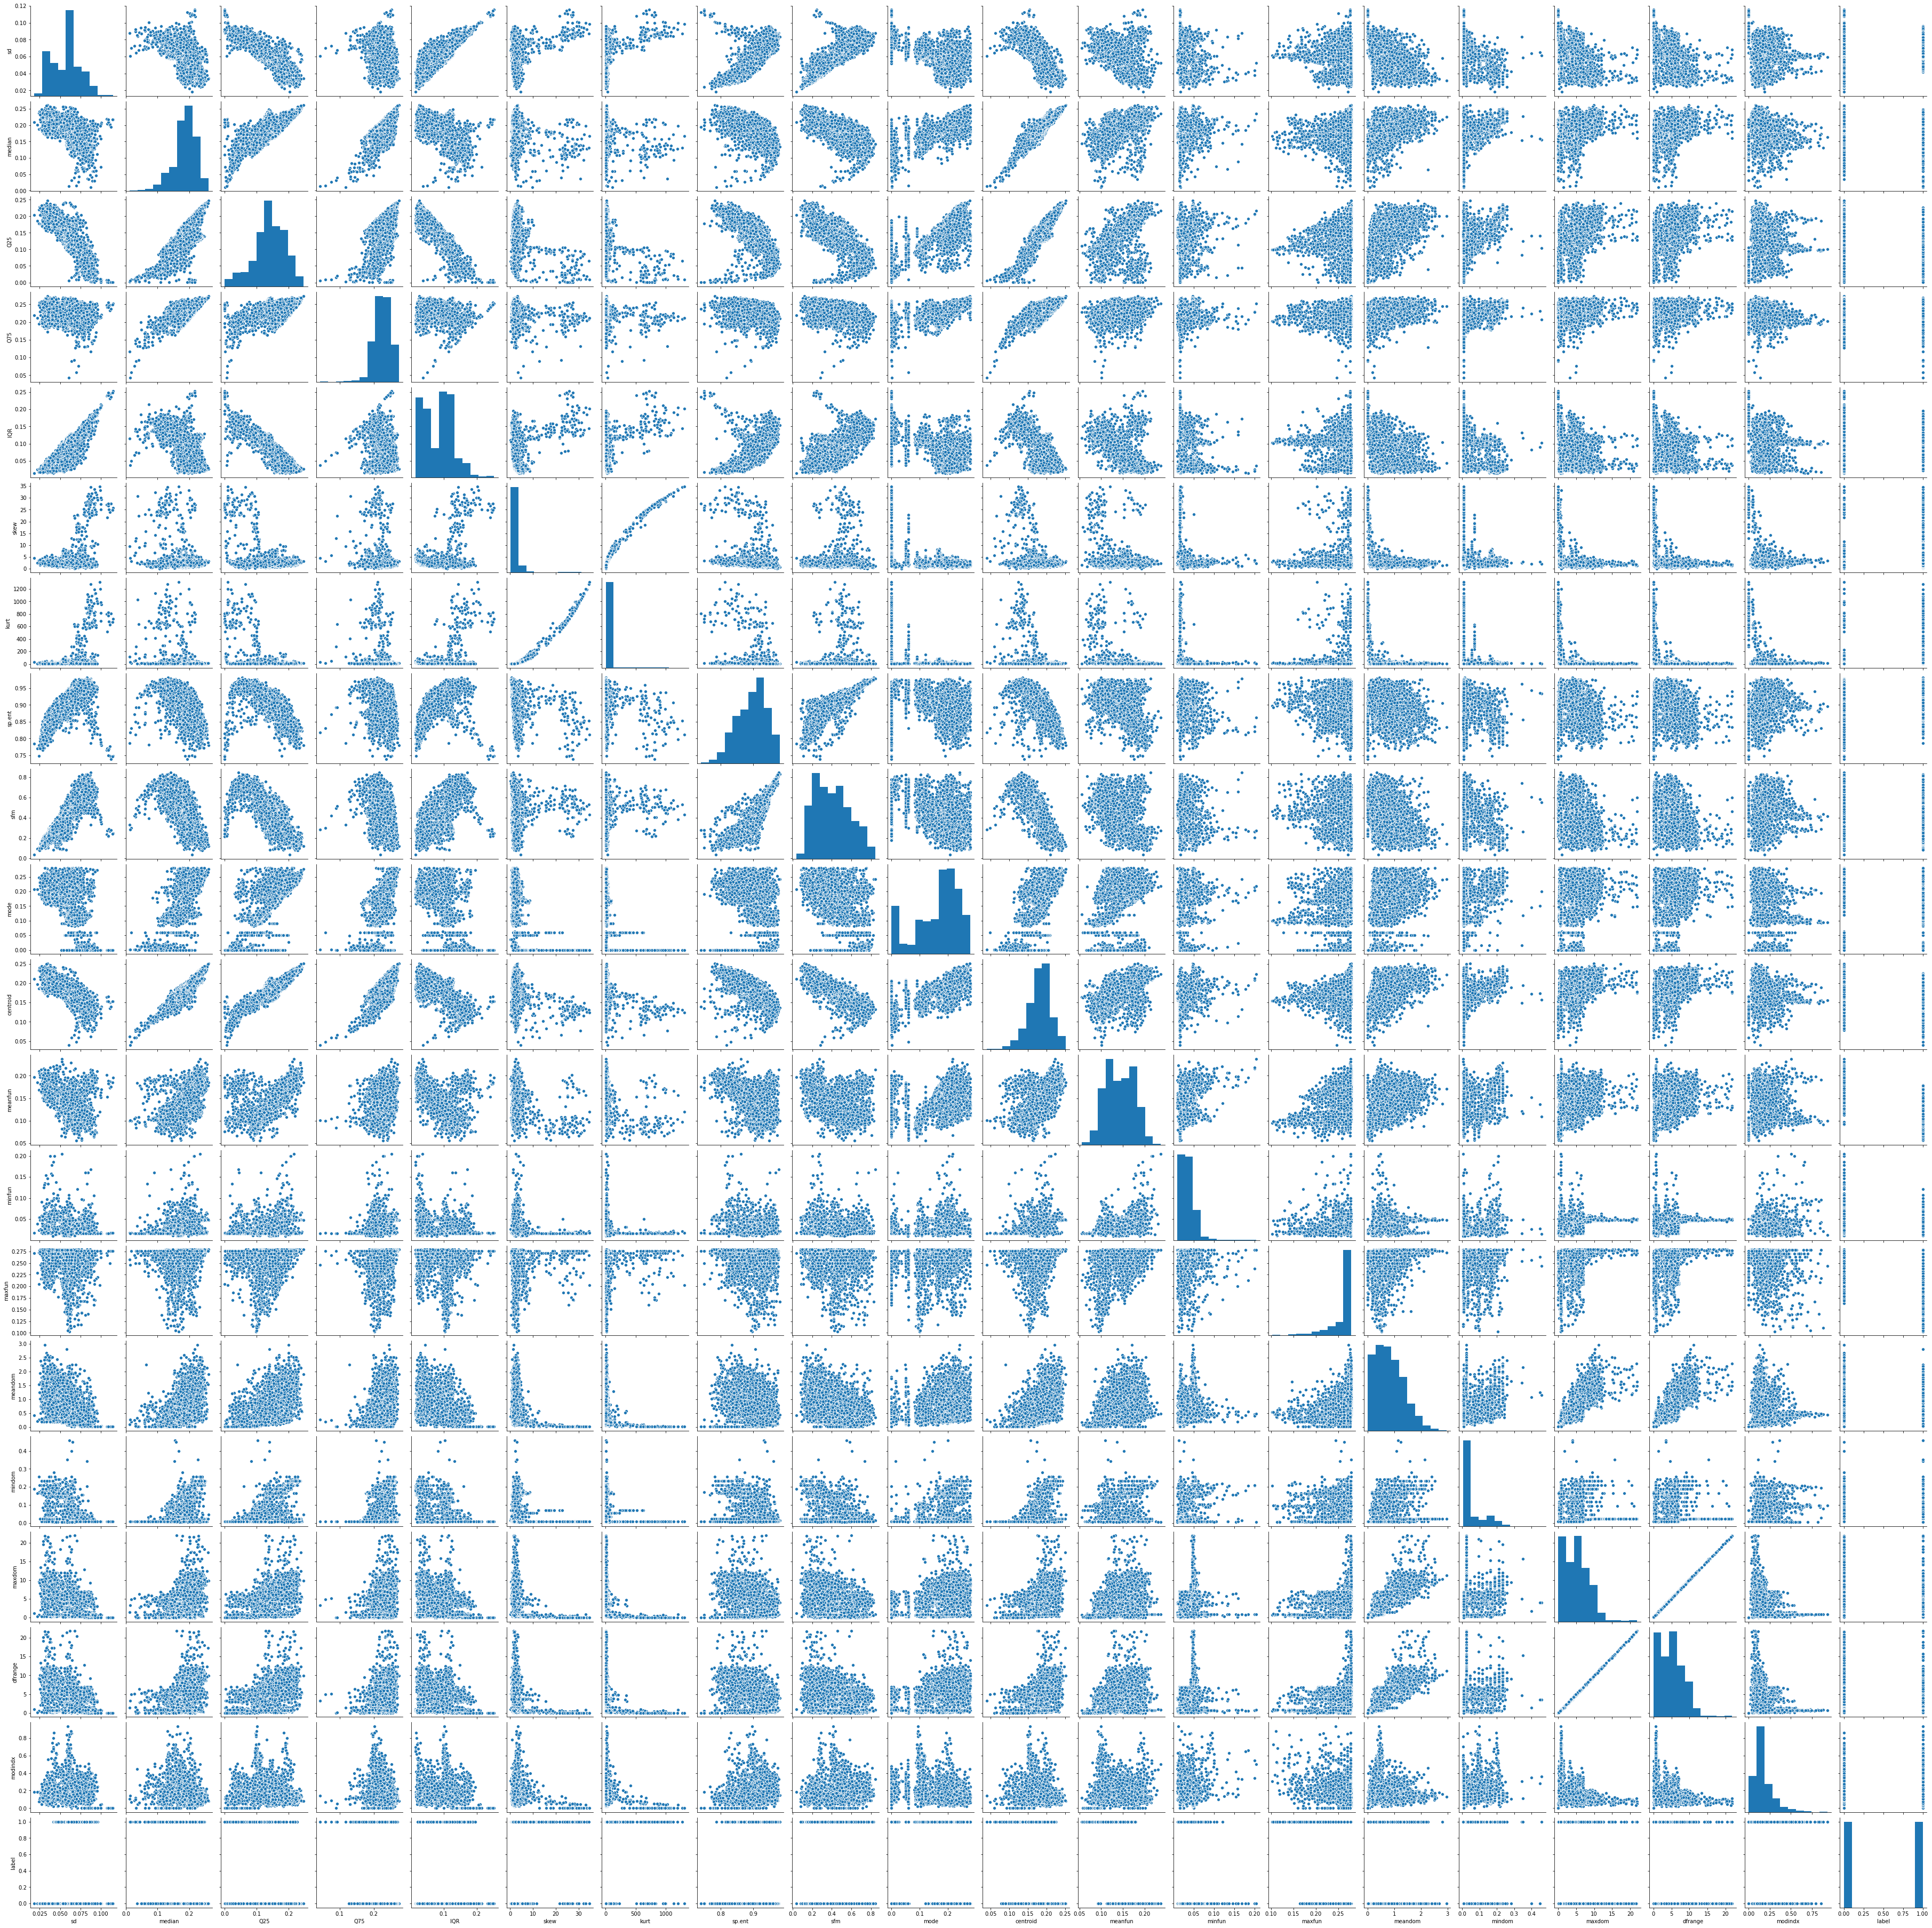

In [4]:
sns.pairplot(dataframe)

In [5]:
dataframe.describe()

sd       median          Q25          Q75          IQR  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.057126     0.185621     0.140456     0.224765     0.084309   
std       0.016652     0.036360     0.048680     0.023639     0.042783   
min       0.018363     0.010975     0.000229     0.042946     0.014558   
25%       0.041954     0.169593     0.111087     0.208747     0.042560   
50%       0.059155     0.190032     0.140286     0.225684     0.094280   
75%       0.067020     0.210618     0.175939     0.243660     0.114175   
max       0.115273     0.261224     0.247347     0.273469     0.252225   

              skew         kurt       sp.ent          sfm         mode  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      3.140168    36.568461     0.895127     0.408216     0.165282   
std       4.240529   134.928661     0.044980     0.177521     0.077203   
min       0.141735     2.068455     0.738651     0.036876     0.000000   
25%       1.649569     5.669547     0.861811     0.258041     0.118016   
50%       2.197101     8.318463     0.901767     0.396335     0.186599   
75%       2.931694    13.648905     0.928713     0.533676     0.221104   
max      34.725453  1309.612887     0.981997     0.842936     0.280000   

          centroid      meanfun       minfun       maxfun      meandom  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.142807     0.036802     0.258842     0.829211   
std       0.029918     0.032304     0.019220     0.030077     0.525205   
min       0.039363     0.055565     0.009775     0.103093     0.007812   
25%       0.163662     0.116998     0.018223     0.253968     0.419828   
50%       0.184838     0.140519     0.046110     0.271186     0.765795   
75%       0.199146     0.169581     0.047904     0.277457     1.177166   
max       0.251124     0.237636     0.204082     0.279114     2.957682   

            mindom       maxdom      dfrange      modindx        label  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.052647     5.047277     4.994630     0.173752     0.500000  
std       0.063299     3.521157     3.520039     0.119454     0.500079  
min       0.004883     0.007812     0.000000     0.000000     0.000000  
25%       0.007812     2.070312     2.044922     0.099766     0.000000  
50%       0.023438     4.992188     4.945312     0.139357     0.500000  
75%       0.070312     7.007812     6.992188     0.209183     1.000000  
max       0.458984    21.867188    21.843750     0.932374     1.000000

<ipython-input-6-96f04eefaf72>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataframe.hist(bins=50, ax=plt.gca());


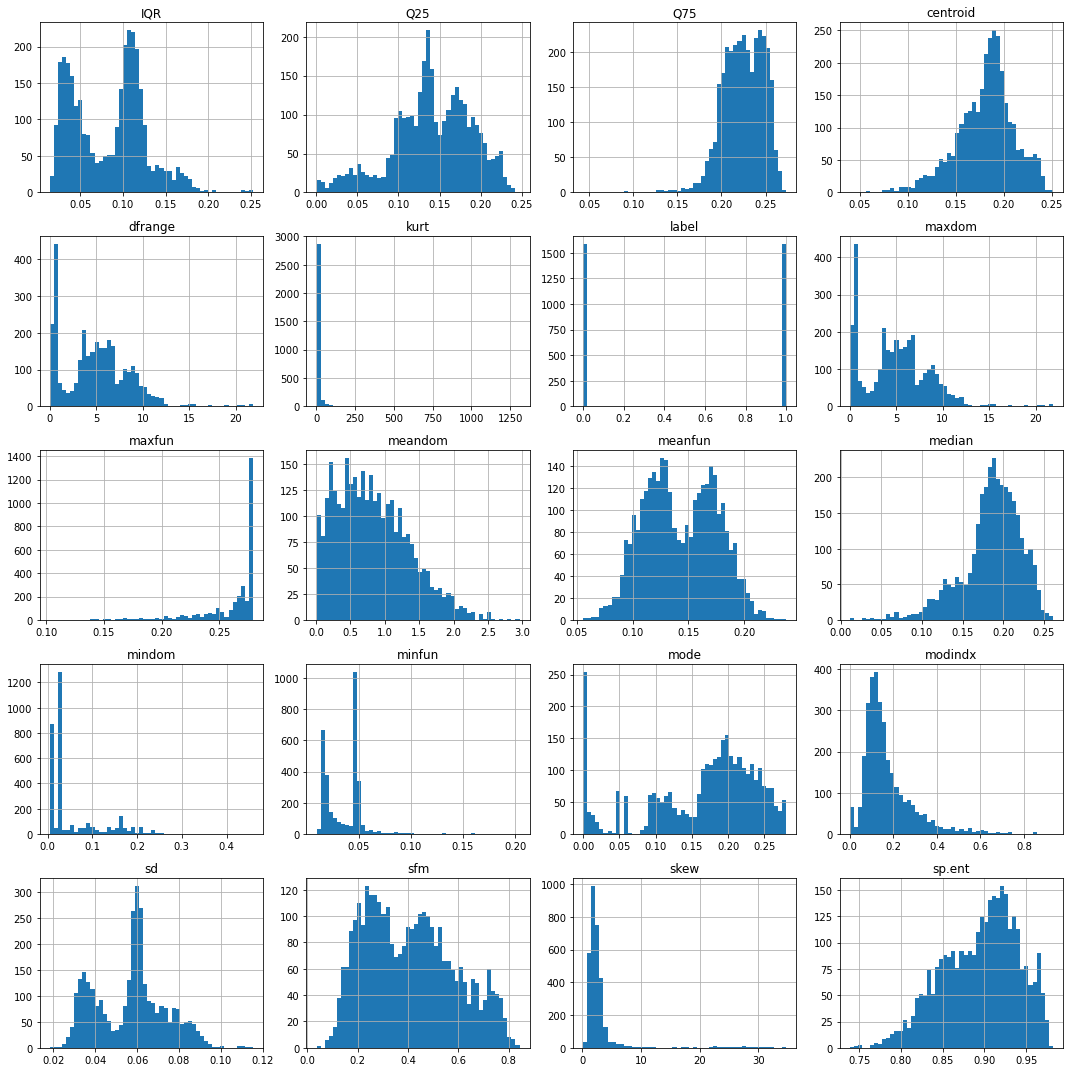

In [6]:
plt.figure(figsize=(15, 15))
dataframe.hist(bins=50, ax=plt.gca());
plt.tight_layout()

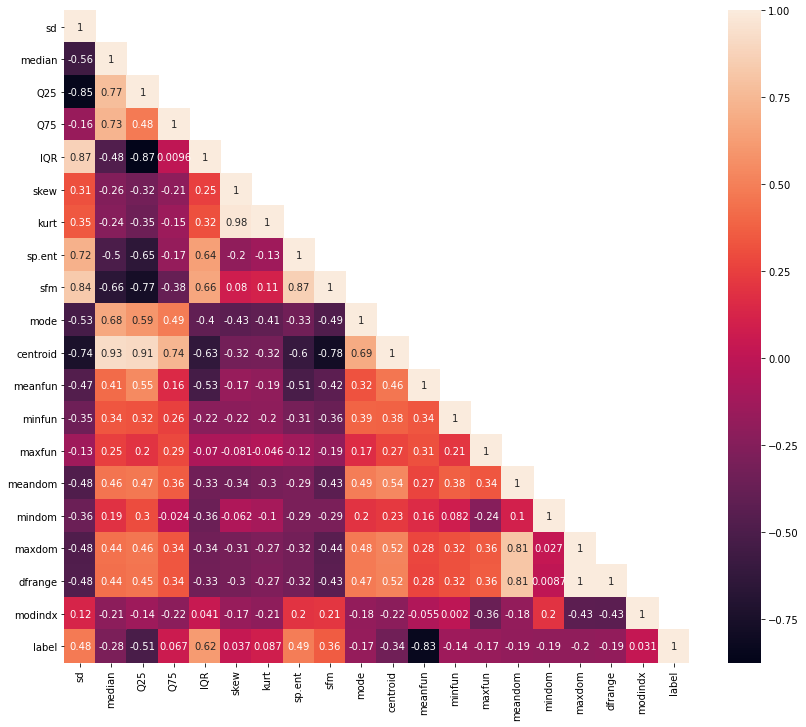

In [36]:
plt.figure(figsize=(14, 12))
n_features = dataframe.shape[1]
mask = np.ones((n_features, n_features))
for r in range(n_features):
    for c in range(n_features):
        if c <= r:
            mask[r, c] = 0
sns.heatmap(dataframe.corr(), annot=True, mask=mask)

In [8]:
X, Y = dataframe.iloc[:, :-1].values, dataframe.iloc[:, -1].values, 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [10]:
logistic_model = LogisticRegression(penalty="none", max_iter=10000)
logistic_model.fit(x_train_norm, y_train)

LogisticRegression(max_iter=10000, penalty='none')

In [11]:
logistic_model.classes_

array([0., 1.])

In [12]:
y_proba_test = logistic_model.predict_proba(x_test_norm)[:, 1]
fpr, tpr, thrs = roc_curve(y_test, y_proba_test)

In [13]:
roc_auc_score(y_test, y_proba_test)

0.9965830410934269

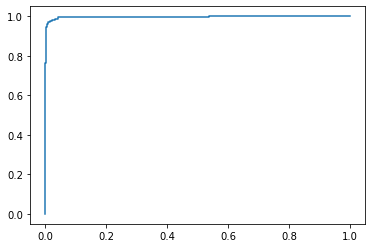

In [14]:
plt.plot(fpr, tpr)

C:\Users\paull\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-15-16e327ced888>:8: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*recall*precision/(recall + precision)


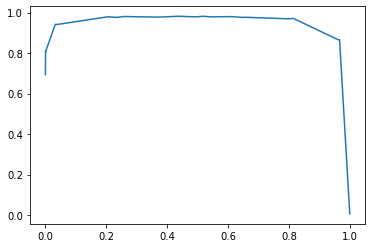

In [15]:
from sklearn.metrics import recall_score, precision_score

f1_arr = []
for thr in thrs:
    recall = recall_score(y_test, y_proba_test >= thr)
    precision = precision_score(y_test, y_proba_test >= thr)

    f1_score = 2*recall*precision/(recall + precision)
    
    f1_arr.append(f1_score)
    
f1_arr = np.array(f1_arr)
plt.plot(thrs, f1_arr)

In [16]:
not_nan = np.argwhere(np.bitwise_not(np.isnan(f1_arr)))
f1_arr = f1_arr[not_nan]
thrs = thrs[not_nan]

In [17]:
best_thr = thrs[np.argmax(f1_arr)]
best_thr, f1_arr.max()

(array([0.43697064]), 0.9821958456973294)

In [20]:

cm = confusion_matrix(y_test, y_proba_test >= best_thr)
accuracy = accuracy_score(y_test, y_proba_test >= best_thr)
balanced_accuracy = balanced_accuracy_score(y_test, y_proba_test >= best_thr)


In [21]:
cm

array([[291,   6],
       [  6, 331]], dtype=int64)

In [22]:
accuracy, balanced_accuracy


(0.9810725552050473, 0.9809969127476545)

# Pt 2

In [23]:
def load_features(filepath):
    with open(filepath) as file:
        content = file.read()
    lines = content.split("\n")
#     print(len(lines))
    for i in range(len(lines)):
        line = lines[i].split(" ")
        lines[i] = [float(x) for x in line if x]

    lines = [line for line in lines if line]    
    return np.array(lines)

In [24]:

x_train = load_features("./har_smartphone/X_train.txt")
x_test = load_features("./har_smartphone/X_test.txt")

y_train = pd.read_csv("./har_smartphone/y_train.txt", header=None).values.flatten()
y_test = pd.read_csv("./har_smartphone/y_test.txt", header=None).values.flatten()

scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

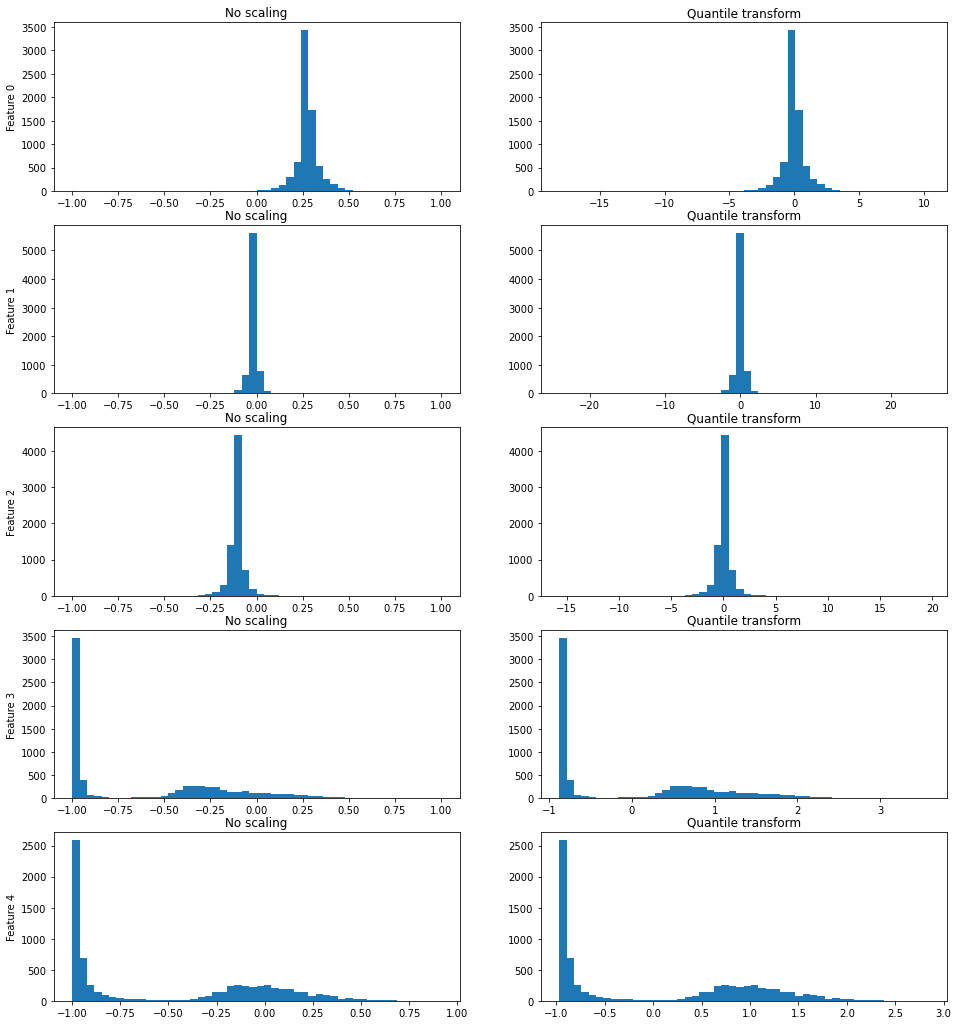

In [25]:
n = 5
fig, axes = plt.subplots(n, 2, figsize=(16, 18))
for i in range(n):
    axes[i, 0].hist(x_train[:, i], bins=50)
    axes[i, 0].set_title("No scaling")

    axes[i, 1].hist(x_train_norm[:, i], bins=50)
    axes[i, 1].set_title("Quantile transform")
    
    axes[i, 0].set_ylabel(f"Feature {i}")

In [26]:
def softmax(x):
    exp = np.exp(x)
    return exp/exp.sum(axis=1).reshape(-1, 1)

class OVA_LogisticRegression():
    
    def __init__(self, n_classes):
        pass
    
    def fit(self, x, y):
        self.classes = np.unique(y)
        self.estimators = []
        self.estimators_dict = {}
            
        for class_ in self.classes:
            label = (y == class_)
            estimator = LogisticRegression(penalty="none", max_iter=10000)
            estimator.fit(x, label)
            self.estimators.append(estimator)
            self.estimators_dict[class_] = estimator
    
    def predict_proba(self, x):
        predictions = []
        for class_, estimator in self.estimators_dict.items():
            pred = estimator.predict_proba(x)[:, 1]
            predictions.append(pred)
        predictions = np.array(predictions).T
        return predictions

    def predict(self, x):
        pred = self.predict_proba(x)
        argmax = np.argmax(softmax(pred), axis=1)
        return self.classes[argmax]
    
model = OVA_LogisticRegression(len(np.unique(y_train)))
# model = LogisticRegression(penalty="none", multi_class="multinomial", max_iter=10000)
        
model.fit(x_train_norm, y_train)

In [27]:
def macro_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average="macro")

In [28]:
macro_f1_score(y_test, model.predict(x_test_norm))

0.9485833558550635

In [29]:
scaler = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
scaler.fit(x_train)

x_train_norm_qtl = scaler.transform(x_train)
x_test_norm_qtl = scaler.transform(x_test)

In [32]:

scorer = make_scorer(macro_f1_score, greater_is_better=True)
n_neighbors_arr = range(5, 76, 5)
weights_arr = ["distance"]

metrics = {}

for n_neighbors, weights in product(n_neighbors_arr, weights_arr):
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        n_jobs=-1
    )
    model.fit(x_train_norm, y_train)
    y_pred = model.predict(x_test_norm)
    cm = confusion_matrix(y_test, y_pred)
    metric = macro_f1_score(y_test, y_pred)
    
    metrics[(n_neighbors, weights, "std")] = metric

    model.fit(x_train_norm_qtl, y_train)
    y_pred = model.predict(x_test_norm_qtl)
    cm_qtl = confusion_matrix(y_test, y_pred)
    metric_qtl = macro_f1_score(y_test, y_pred)
    
    metrics[(n_neighbors, weights, "quantile")] = metric_qtl
    print(n_neighbors, weights)
    print("Metric using StandardScaler:", metric)
    print("Metric using QuantileTransformer:", metric_qtl)
    print(cm_qtl, end="\n\n")
    


5 distance
Metric using StandardScaler: 0.88132665830092
Metrics using QuantileTransformer: 0.9027021480615818
[[489   5   2   0   0   0]
 [ 22 444   5   0   0   0]
 [ 28  43 349   0   0   0]
 [  0   4   0 391  81  15]
 [  0   1   0  28 502   1]
 [  0   0   0  34  15 488]]
7 distance
Metric using StandardScaler: 0.8858540687513677
Metrics using QuantileTransformer: 0.9054926746952954
[[489   4   3   0   0   0]
 [ 22 445   4   0   0   0]
 [ 30  43 347   0   0   0]
 [  0   4   0 396  75  16]
 [  0   0   0  21 510   1]
 [  0   0   0  36  16 485]]
9 distance
Metric using StandardScaler: 0.8878327065473077
Metrics using QuantileTransformer: 0.9088740039682737
[[490   4   2   0   0   0]
 [ 28 441   2   0   0   0]
 [ 30  44 346   0   0   0]
 [  0   4   0 393  77  17]
 [  0   0   0  15 516   1]
 [  0   0   0  24  16 497]]
11 distance
Metric using StandardScaler: 0.8846894373602946
Metrics using QuantileTransformer: 0.9050285060277391
[[490   4   2   0   0   0]
 [ 29 440   2   0   0   0]
 [ 31 

In [34]:
best_metric = 0
best_keys = None
for key in metrics:
    if metrics[key] > best_metric:
        best_metric = metrics[key]
        best_keys = key
key, best_metric

((49, 'distance', 'quantile'), 0.9088740039682737)

In [ ]:
model = gs.best_estimator_
balanced_accuracy_score(y_test, model.predict(x_test_norm))